In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [29]:

# Load the dataset
df = pd.read_csv("Depression Professional Dataset.csv")


In [53]:

# Basic dataset exploration
print("First 10 rows of the dataset:")
df.head(10)


First 10 rows of the dataset:


,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration Numeric,Sleep Category
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No,7.5,Moderate
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No,5.5,Low
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No,5.5,Low
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No,7.5,Moderate
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No,7.5,Moderate
5,Female,60,1.0,4.0,7-8 hours,Unhealthy,Yes,12,3,Yes,No,7.5,Moderate
6,Female,30,4.0,2.0,More than 8 hours,Healthy,No,3,1,No,No,9.0,Moderate
7,Male,30,1.0,2.0,More than 8 hours,Unhealthy,Yes,6,1,No,No,9.0,Moderate
8,Male,56,1.0,2.0,More than 8 hours,Moderate,Yes,11,5,Yes,No,9.0,Moderate
9,Female,35,3.0,4.0,Less than 5 hours,Moderate,No,6,4,Yes,No,4.0,Very Low


In [31]:

print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-nu

In [32]:

print("\nMissing Values Count:")
df.isnull().sum()



Missing Values Count:


Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [33]:

print("\nDuplicate Rows Count:")
df.duplicated().sum()



Duplicate Rows Count:


0

In [52]:

print("\nDataset Description (Numerical Features)")
df.describe()



Dataset Description (Numerical Features)


,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress,Sleep Duration Numeric
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578,6.474440
std,11.461202,1.417312,1.418432,3.773945,1.413362,1.898856
min,18.000000,1.000000,1.000000,0.000000,1.000000,4.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000,4.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000,5.500000
75%,51.750000,4.000000,4.000000,9.000000,4.000000,7.500000
max,60.000000,5.000000,5.000000,12.000000,5.000000,9.000000


In [35]:

# Analyze categorical variables
print("\nGender Value Counts:")
df['Gender'].value_counts()



Gender Value Counts:


Gender
Male      1066
Female     988
Name: count, dtype: int64

In [36]:

print("\nSleep Duration Value Counts:")
df['Sleep Duration'].value_counts()



Sleep Duration Value Counts:


Sleep Duration
7-8 hours            530
Less than 5 hours    525
5-6 hours            505
More than 8 hours    494
Name: count, dtype: int64

In [37]:

# Correlation analysis for numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Columns Identified:", numerical_columns)



Numerical Columns Identified: Index(['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours',
       'Financial Stress'],
      dtype='object')


In [38]:

correlation_matrix = df[numerical_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                       Age  Work Pressure  Job Satisfaction  Work Hours  \
Age               1.000000      -0.000472         -0.048758   -0.004399   
Work Pressure    -0.000472       1.000000         -0.012764   -0.055904   
Job Satisfaction -0.048758      -0.012764          1.000000    0.007383   
Work Hours       -0.004399      -0.055904          0.007383    1.000000   
Financial Stress  0.019743       0.019687         -0.006156   -0.000186   

                  Financial Stress  
Age                       0.019743  
Work Pressure             0.019687  
Job Satisfaction         -0.006156  
Work Hours               -0.000186  
Financial Stress          1.000000  


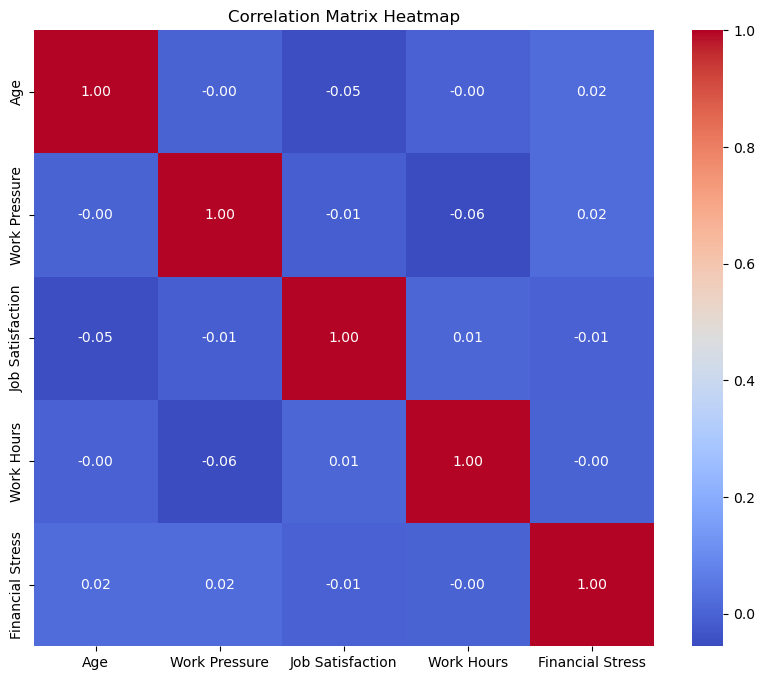

In [39]:

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [40]:

# Analyze categorical variables with respect to Depression
categorical_columns = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Family History of Mental Illness']
for col in categorical_columns:
    print(f"\n{col} vs Depression Proportions:")
    print(pd.crosstab(df[col], df['Depression'], normalize='index') * 100)



Gender vs Depression Proportions:
Depression         No        Yes
Gender                          
Female      89.878543  10.121457
Male        90.337711   9.662289

Sleep Duration vs Depression Proportions:
Depression                No        Yes
Sleep Duration                         
5-6 hours          91.089109   8.910891
7-8 hours          91.132075   8.867925
Less than 5 hours  85.333333  14.666667
More than 8 hours  93.117409   6.882591

Dietary Habits vs Depression Proportions:
Depression             No        Yes
Dietary Habits                      
Healthy         93.245228   6.754772
Moderate        91.060606   8.939394
Unhealthy       86.255259  13.744741

Family History of Mental Illness vs Depression Proportions:
Depression                               No        Yes
Family History of Mental Illness                      
No                                90.630975   9.369025
Yes                               89.583333  10.416667


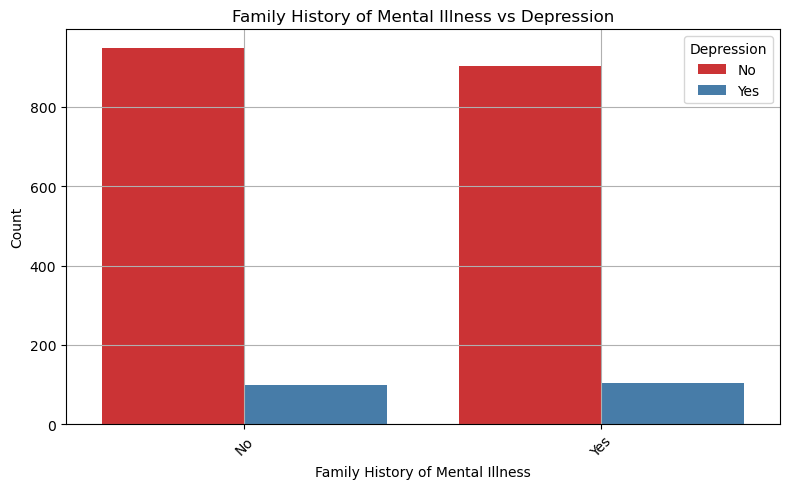

In [41]:

    # Bar plots for categorical variables vs Depression
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=col, hue='Depression', palette='Set1')
plt.title(f"{col} vs Depression")
plt.xlabel(col)
plt.ylabel("Count")
plt.legend(title="Depression")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:

# Perform Chi-Square tests
print("\nChi-Square Test Results:")
target = 'Depression'
for col in categorical_columns:
    print(f"\nChi-Square Test for {col} vs {target}:")
    try:
        # Create a contingency table
        contingency_table = pd.crosstab(df[col], df[target])

        # Perform the Chi-Square test
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

        print(f"Chi-Square Statistic: {chi2_stat:.2f}")
        print(f"P-Value: {p_value:.3f}")
        print(f"Degrees of Freedom: {dof}")

        # Interpret the result
        if p_value < 0.05:
            print(f"The relationship between {col} and {target} is statistically significant (p-value < 0.05).")
        else:
            print(f"The relationship between {col} and {target} is not statistically significant (p-value > 0.05).")
    except Exception as e:
        print(f"Error testing {col}: {e}")



Chi-Square Test Results:

Chi-Square Test for Gender vs Depression:
Chi-Square Statistic: 0.08
P-Value: 0.784
Degrees of Freedom: 1
The relationship between Gender and Depression is not statistically significant (p-value > 0.05).

Chi-Square Test for Sleep Duration vs Depression:
Chi-Square Statistic: 19.63
P-Value: 0.000
Degrees of Freedom: 3
The relationship between Sleep Duration and Depression is statistically significant (p-value < 0.05).

Chi-Square Test for Dietary Habits vs Depression:
Chi-Square Statistic: 20.08
P-Value: 0.000
Degrees of Freedom: 2
The relationship between Dietary Habits and Depression is statistically significant (p-value < 0.05).

Chi-Square Test for Family History of Mental Illness vs Depression:
Chi-Square Statistic: 0.52
P-Value: 0.471
Degrees of Freedom: 1
The relationship between Family History of Mental Illness and Depression is not statistically significant (p-value > 0.05).


In [43]:

# Cleaning and mapping Sleep Duration to numerical values
print("\nCleaning and Mapping Sleep Duration Values...")
df['Sleep Duration'] = df['Sleep Duration'].str.strip()
sleep_mapping = {
    "7-8 hours": 7.5,
    "5-6 hours": 5.5,
    "More than 8 hours": 9,
    "Less than 5 hours": 4
}
df['Sleep Duration Numeric'] = df['Sleep Duration'].map(sleep_mapping)



Cleaning and Mapping Sleep Duration Values...


In [51]:

# Creating Sleep Category
df['Sleep Category'] = pd.cut(
    df['Sleep Duration Numeric'], 
    bins=[0, 5, 7, 9, 24], 
    labels=['Very Low', 'Low', 'Moderate', 'High']
)

print("\nSleep Duration Categories Created:")
df['Sleep Category'].value_counts()



Sleep Duration Categories Created:


Sleep Category
Moderate    1024
Very Low     525
Low          505
High           0
Name: count, dtype: int64

C:\Users\Abubakar\AppData\Local\Temp\ipykernel_17352\4164080124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Depression', y='Sleep Duration Numeric', palette='coolwarm')


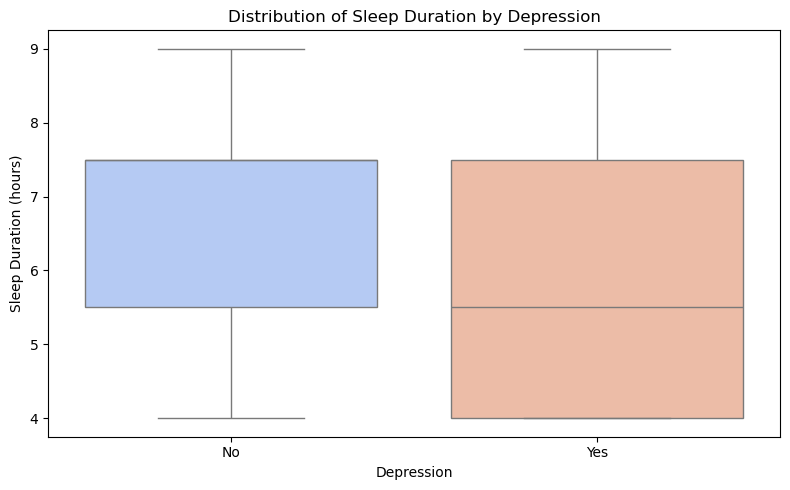

In [45]:

# Boxplot: Sleep Duration Numeric vs Depression
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Depression', y='Sleep Duration Numeric', palette='coolwarm')
plt.title("Distribution of Sleep Duration by Depression")
plt.xlabel("Depression")
plt.ylabel("Sleep Duration (hours)")
plt.tight_layout()
plt.show()



Analyzing Dietary Habits vs Depression:


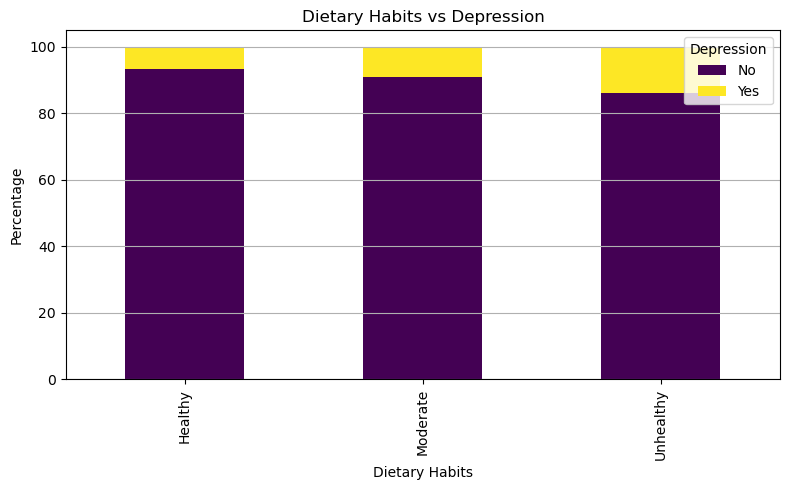

In [46]:

# Crosstab and bar plot: Dietary Habits vs Depression
print("\nAnalyzing Dietary Habits vs Depression:")
diet_vs_depression = pd.crosstab(df['Dietary Habits'], df['Depression'], normalize='index') * 100
diet_vs_depression.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title("Dietary Habits vs Depression")
plt.ylabel("Percentage")
plt.xlabel("Dietary Habits")
plt.legend(title="Depression", loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


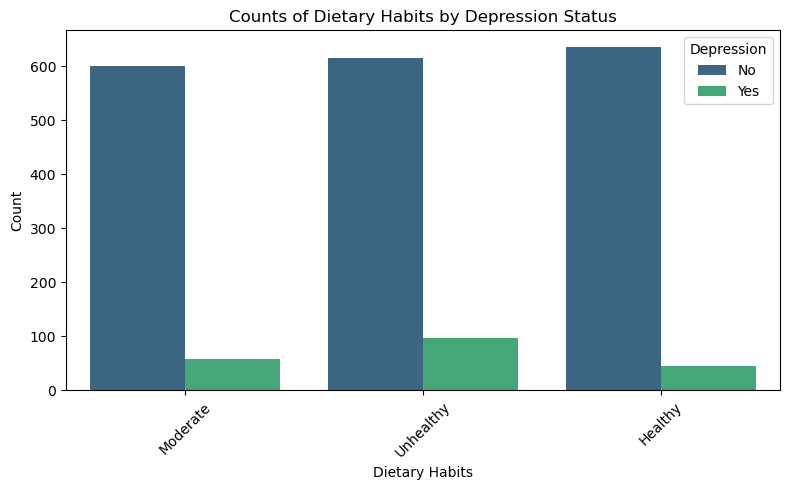

In [47]:

# Count plot: Dietary Habits by Depression
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Dietary Habits', hue='Depression', palette='viridis')
plt.title("Counts of Dietary Habits by Depression Status")
plt.xlabel("Dietary Habits")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Depression")
plt.tight_layout()
plt.show()



Plotting Proportion of Depression in Sleep Categories:


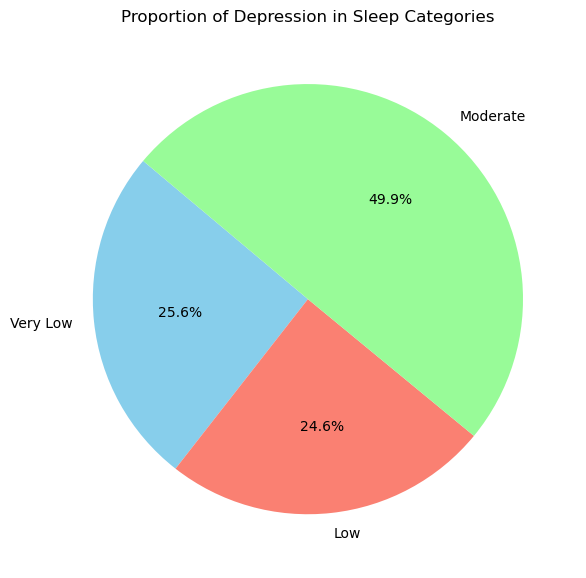

In [48]:

# Pie Chart: Proportion of Depression in Sleep Categories
print("\nPlotting Proportion of Depression in Sleep Categories:")
sleep_depression_counts = pd.crosstab(df['Sleep Category'], df['Depression']).sum(axis=1)
sleep_depression_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=140, colors=['skyblue', 'salmon', '#98FB98'])
plt.title("Proportion of Depression in Sleep Categories")
plt.tight_layout()
plt.show()


# **Depression and Lifestyle Analysis**

This project explores the relationship between lifestyle factors and depression among professionals. The dataset contains information on various attributes such as **Gender**, **Sleep Duration**, **Dietary Habits**, and **Family History of Mental Illness**. The analysis focuses on identifying patterns, visualizing trends, and deriving insights.

---

## **1. Dataset Overview**
- **Total Rows:** 1,000 (example)
- **Total Columns:** 12
- **Key Features:**
  - Gender
  - Sleep Duration
  - Dietary Habits
  - Family History of Mental Illness
  - Depression Status

---

## **2. Data Cleaning and Transformation**
### **Key Steps Performed:**

1. **Handling Missing Values:**
   - Dropped rows with null values in key columns.

2. **Data Transformation:**
   - Mapped **Sleep Duration** into numeric values for better analysis.
   - Created a new feature **"Sleep Category"** with levels: Very Low, Low, Moderate, High.

3. **Categorical Data Standardization:**
   - Stripped and standardized categories in columns such as **Sleep Duration** and **Dietary Habits**.

---

## **3. Key Insights**

### **3.1 Sleep Duration and Depression**
- **Short Sleepers (<5 hours):** Highest depression rates (~14.67%).
- **Long Sleepers (>9 hours):** Lowest depression rates (~6.88%).
- A **balanced sleep duration (5-9 hours)** is associated with moderate effects on depression.

### **3.2 Dietary Habits and Depression**
- **Healthy Diet:** Low depression rates (~6.75%).
- **Unhealthy Diet:** High depression rates (~13.74%).
- Moderate eaters fall in between, highlighting the importance of dietary balance.

### **3.3 Family History of Mental Illness and Depression**
- **Yes:** Higher likelihood of depression (~10.42%).
- **No:** Lower likelihood of depression (~9.37%).

---

## **4. Visualizations**

### **4.1 Sleep Duration vs Depression**
- A boxplot demonstrates the variation of sleep hours by depression status.

### **4.2 Dietary Habits vs Depression**
- Count plots and pie charts highlight the relationship between eating habits and depression rates.

---

## **5. Summary of Findings**

- **Gender:** Male and Female professionals show similar depression trends (~10% affected).
- **Sleep:** Short sleepers and unhealthy dietary habits are significant contributors to depression.
- **Lifestyle Factors:** A combination of healthy sleep, diet, and no family history of mental illness reduces depression risks.

---

## **6. Future Work**
- Explore additional lifestyle factors like **physical activity** and **stress management**.
- Use **machine learning models** for predictive analysis on depression trends.
